## Task 1 - *Exploration of customer purchasing behavior*

### 1.1. Preprocessing

### *Importing liberaries*

In [23]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys,os

In [24]:
sys.path.append(os.path.abspath(os.path.join('../modules')))
warnings.filterwarnings("ignore")
sns.set()

### Import modules

In [25]:
from load_file import FileHandler
from overview import DfOverview
from cleaner_df import DfCleaner
from outlier import DfOutlier
from vis_seaborn import VisSeaborn
from vis_plotly import VisPlotly

In [26]:
file_loader = FileHandler()
my_clean = DfCleaner()

In [27]:
#stored_df = file_loader.read_csv('../data/store.csv')
train_df = file_loader.read_csv('../data/train.csv')
test_df = file_loader.read_csv('../data/test.csv')
stored_df = file_loader.read_csv('../data/store.csv')
print("\n### General data Structure ###\n")

print("Stored data:",stored_df.shape)
print("Train data:",train_df.shape)
print("Test data:",test_df.shape)

2022-05-24 12:54:23,841 — DfHelper — DEBUG — file read as csv
2022-05-24 12:54:23,888 — DfHelper — DEBUG — file read as csv
2022-05-24 12:54:23,893 — DfHelper — DEBUG — file read as csv

### General data Structure ###

Stored data: (1115, 10)
Train data: (1017209, 9)
Test data: (41088, 8)


 ### *Feature Dicriptions of the Data* ###
 
The following are descriptions of **Rossmann Pharmaceuticals** data set.
- **`Id`** - an Id that represents a (Store, Date) duple within the test set
- **`Store`** - a unique Id for each store
- **`Sales`** - the turnover for any given day (this is what you are predicting)
- **`Customers`** - the number of customers on a given day
- **`Open`** - an indicator for whether the store was open: 0 = closed, 1 = open
- **`StateHoliday`** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 

**Note that** all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- **`SchoolHoliday`** - indicates if the (Store, Date) was affected by the closure of public schools
- **`StoreType`** - differentiates between 4 different store models: a, b, c, d
- **`Assortment`** - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here
- **`CompetitionDistance`** - distance in meters to the nearest competitor store
- **`CompetitionOpenSince[Month/Year]`** - gives the approximate year and month of the time the nearest competitor was opened
- **`Promo`** - indicates whether a store is running a promo on that day
- **`Promo2`** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **`Promo2Since[Year/Week]`** - describes the year and calendar week when the store started participating in Promo2
- **`PromoInterval`** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
- The data for this challenge can be found https://www.kaggle.com/competitions/rossmann-store-sales/data.

### Information Stored on each dataset

In [28]:
stored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


## Data Preprocessing

### Cleaning

In [32]:
store_overview = DfOverview(stored_df)
store_overview.getOverview()

,count,none_count,none_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Store,1115,0,0.0%,1115,100.0%,int64
StoreType,1115,0,0.0%,4,0.36%,object
Assortment,1115,0,0.0%,3,0.27%,object
Promo2,1115,0,0.0%,2,0.18%,int64
CompetitionDistance,1112,3,0.27%,654,58.65%,float64
CompetitionOpenSinceMonth,761,354,31.75%,12,1.08%,float64
CompetitionOpenSinceYear,761,354,31.75%,23,2.06%,float64
Promo2SinceWeek,571,544,48.79%,24,2.15%,float64
Promo2SinceYear,571,544,48.79%,7,0.63%,float64


**Observations:-**
- From the 10 columns, 6 have a null value. 
- The column with minimum missing values is in **CompetitionDistance.** and those can be filled with with a median   value.
- **PromoInterval, Promo2SinceYear, and Promo2SinceWeek** column has equal number of counts and missed values which is 544.
- **CompetitionOpenSinceYear, CompetitionOpenSinceMonth** column has equal number of counts and missed values which is .

In [33]:
stored_df = my_clean.fill_with_median(stored_df, ['CompetitionDistance'])

- looking in to `CompetitionDistance`

In [34]:
print(np.sort(stored_df['CompetitionOpenSinceMonth'].unique()))
print(np.sort(stored_df['CompetitionOpenSinceYear'].unique()))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]
[1900. 1961. 1990. 1994. 1995. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


**Observation:-**
- `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` Columns hold the year and month when a new competition opened.
- `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` having null value is meaning full. It means competition for a store has already been there before the store is established or there is no competition.
- The longest time we have in the dataset is 1900. So I decide to replaced the missed values with the first month 1990.

In [35]:
stored_df['CompetitionOpenSinceMonth'] = stored_df['CompetitionOpenSinceMonth'].fillna(1)
stored_df['CompetitionOpenSinceYear'] = stored_df['CompetitionOpenSinceYear'].fillna(1990)

- Looking in to the rest columns

In [36]:
print(np.sort(stored_df['Promo2SinceWeek'].unique()))
print(np.sort(stored_df['Promo2SinceYear'].unique()))
print(stored_df['PromoInterval'].unique())

[ 1.  5.  6.  9. 10. 13. 14. 18. 22. 23. 26. 27. 28. 31. 35. 36. 37. 39.
 40. 44. 45. 48. 49. 50. nan]
[2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [37]:
stored_df[stored_df['Promo2'] == 0][['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].head(5)

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN


**Observation:-** 
- The three columns are dependent on Promo2, and those messing the value is because Promo2 is equal to **zero**. 
- So it is expected to create a new column holding if the store participated in promo2 and then we can replace Promo2SinceYear and Promo2SinceWeek with the earliest month and week.

In [38]:
print(pd.isnull(stored_df['PromoInterval'][0]))

True


In [40]:
stored_df['Promo2SinceWeek'] = stored_df['Promo2SinceWeek'].fillna(0)
stored_df['Promo2SinceYear'] = stored_df['CompetitionOpenSinceYear'].fillna(0)

- From the previous resulst we observed that Entries in PromotionInterval have 4 entries. 
- So I am going to split those points into 4 columns

In [41]:
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

def getMonth(months, index):
    if(months == 0):
        return 0

    month = months.split(',')[index]
    return month_abbr.index(month)+1

In [42]:
stored_df['PromoInterval'] = stored_df['PromoInterval'].fillna(0)
stored_df['PromoInterval0'] = stored_df.PromoInterval.apply((lambda x: getMonth(x, 0)))
stored_df['PromoInterval1'] = stored_df.PromoInterval.apply((lambda x: getMonth(x, 1)))
stored_df['PromoInterval2'] = stored_df.PromoInterval.apply((lambda x: getMonth(x, 2)))
stored_df['PromoInterval3'] = stored_df.PromoInterval.apply((lambda x: getMonth(x, 3)))
stored_df = my_clean.drop_columns(stored_df, ['PromoInterval'])

In [45]:
store_overview = DfOverview(stored_df)
store_overview.missing_value()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Looking in to training data

In [48]:
train_overview = DfOverview(train_df.copy())
train_overview.getOverview()[:10]

,count,none_count,none_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Store,1017209,0,0.0%,1115,0.11%,int64
DayOfWeek,1017209,0,0.0%,7,0.0%,int64
Date,1017209,0,0.0%,942,0.09%,object
Sales,1017209,0,0.0%,21734,2.14%,int64
Customers,1017209,0,0.0%,4086,0.4%,int64
Open,1017209,0,0.0%,2,0.0%,int64
Promo,1017209,0,0.0%,2,0.0%,int64
StateHoliday,1017209,0,0.0%,5,0.0%,object
SchoolHoliday,1017209,0,0.0%,2,0.0%,int64


**Observation-**
- The training data has no error and did't require additional pre-processing

#### Looking into test dataset

In [51]:
test_overview = DfOverview(test_df)
test_overview.getOverview()

,count,none_count,none_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Id,41088,0,0.0%,41088,100.0%,int64
Store,41088,0,0.0%,856,2.08%,int64
DayOfWeek,41088,0,0.0%,7,0.02%,int64
Date,41088,0,0.0%,48,0.12%,object
Promo,41088,0,0.0%,2,0.0%,int64
StateHoliday,41088,0,0.0%,2,0.0%,object
SchoolHoliday,41088,0,0.0%,2,0.0%,int64
Open,41077,11,0.03%,2,0.0%,float64


**Observation-**
- Looks fine except the open column has 11 noll values.

In [52]:
test_df[pd.isnull(test_df['Open'])]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


- We can see that, all of the null values are from store `622`

In [53]:
unknown_date = test_df[pd.isnull(test_df['Open'])]['Date'].values
temp_df = train_df[train_df['Store'] == 622]
[cols for cols in train_df['Store'] if cols in unknown_date]

[]

- We can see that there is no record in training data set about store 622 on these days.

#### Apply fill_forward aproach

In [54]:
df_test = my_clean.fix_missing_ffill(test_df, ['Open'])

In [57]:
test_overview = DfOverview(test_df)
test_overview.missing_value()

[0, 0, 0, 0, 0, 0, 0, 0]

In [58]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#### chek and handle zero Sales

In [59]:
closed_store_count = train_df[(train_df.Open == 0) & (train_df.Sales == 0)].shape[0]

print(f"Closed stores count: {closed_store_count}")
print(f"Closed stores percentage: {(closed_store_count/train_df.shape[0]*100):.4}%", )

Closed stores count: 172817
Closed stores percentage: 16.99%


**Observation-**
- There are 172,817 closed stores in the data set and counts approximatly 17%

In [60]:
closed_store_count = df_test[(df_test.Open == 0)].shape[0]
closed_store_count

5984

#### Check and handel outliers

- Since CompetitionDistance  has more uniqu values

In [61]:
outliers_df = DfOutlier(stored_df[['CompetitionDistance']].copy())
overview = outliers_df.getOverview()
overview

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
CompetitionDistance,108,9.69%,2.934389,720.0,2325.0,6875.0


In [62]:
stored_df[['CompetitionDistance']].describe()

,CompetitionDistance
count,1115.000000
mean,5396.614350
std,7654.513635
min,20.000000
25%,720.000000
50%,2325.000000
75%,6875.000000
max,75860.000000


In [63]:
#using seaborne plotter
sbp =  VisSeaborn()

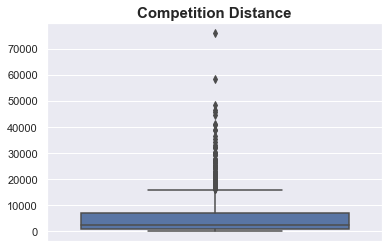

In [64]:
sbp.boxplot(stored_df, ['CompetitionDistance'], 'Competition Distance', figsize=(6, 4))

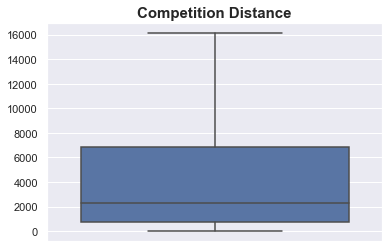

In [65]:
outliers = DfOutlier(stored_df)
outliers.replace_outliers_with_iqr(['CompetitionDistance'])

stored_df = outliers.df
sbp.boxplot(stored_df, ['CompetitionDistance'], 'Competition Distance', figsize=(6, 4))

#### look into `Sales` and `Customers` of training data. 

In [66]:
outliers = DfOutlier(train_df[['Sales', 'Customers']].copy())
overview = outliers.getOverview()
overview

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
Sales,26694,2.62%,0.64146,3727.0,5744.0,7856.0
Customers,38095,3.75%,1.59865,405.0,609.0,837.0


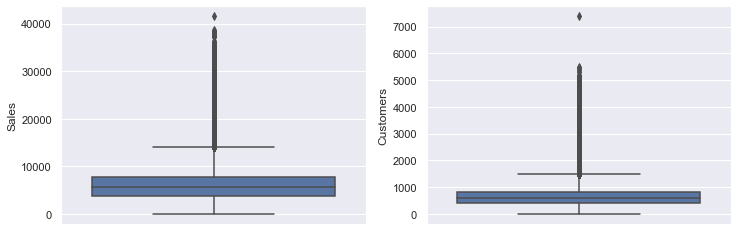

In [67]:
sbp.boxplot(train_df, ['Sales', 'Customers'], cols=2, figsize=(12, 4))

In [68]:
outliers = DfOutlier(train_df)
outliers.replace_outliers_with_iqr(['Sales', 'Customers'])
train_df = outliers.df

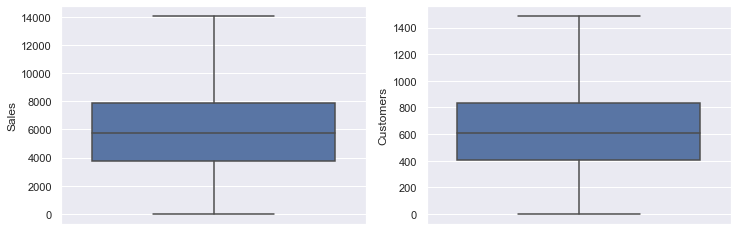

In [69]:
sbp.boxplot(train_df, ['Sales', 'Customers'], cols=2, figsize=(12, 4))

#### Manage Data types
- Date and time 
- Categorical columns to Integer
- Discrete values of the data set to int

In [70]:
train_df = my_clean.convert_to_datetime(train_df, ['Date'])
test_df = my_clean.convert_to_datetime(test_df, ['Date'])

In [71]:
print("Unique datapoints in StateHoliday", stored_df['StoreType'].unique())
print("Unique datapoints in StateHoliday", stored_df['Assortment'].unique())
print("Unique datapoints in StateHoliday", train_df['StateHoliday'].unique())

Unique datapoints in StateHoliday ['c' 'a' 'd' 'b']
Unique datapoints in StateHoliday ['a' 'c' 'b']
Unique datapoints in StateHoliday ['0' 'a' 'b' 'c' 0]


In [72]:
train_df["StateHoliday"].loc[train_df["StateHoliday"] == 0] = "0";
test_df["StateHoliday"].loc[test_df["StateHoliday"] == 0] = "0"

In [73]:
chars = ["0", "a", "b", "c"]
train_df['StateHoliday'] = train_df['StateHoliday'].apply(lambda x: chars.index(x))
test_df['StateHoliday'] = test_df['StateHoliday'].apply(lambda x: chars.index(x))

In [74]:
chars = ["a", "b", "c", "d"]
stored_df['StoreType'] = stored_df['StoreType'].apply(lambda x: chars.index(x))
stored_df['Assortment'] = stored_df['Assortment'].apply(lambda x: chars.index(x))

In [75]:
stored_df = my_clean.convert_to_integer(stored_df, ['StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'])
train_df = my_clean.convert_to_integer(train_df, ['StateHoliday', 'SchoolHoliday', 'Customers', 'Sales', 'Open'])
test_df = my_clean.convert_to_integer(test_df, ['StateHoliday', 'SchoolHoliday', 'Open'])

#### Store each of the cleaned data for the next phase

In [76]:
Stor_file = FileHandler()

In [78]:
Stor_file.save_csv(stored_df, '../data/store.csv')
Stor_file.save_csv(train_df, '../data/train.csv')
Stor_file.save_csv(test_df, '../data/test.csv')

2022-05-24 14:28:44,655 — DfHelper — INFO — file saved as csv
2022-05-24 14:28:58,186 — DfHelper — INFO — file saved as csv
2022-05-24 14:28:58,759 — DfHelper — INFO — file saved as csv
